In [1]:
#import MySQLdb
import mysql.connector as MySQLdb
import os
import pprint
import json
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
db = MySQLdb.connect(host="129.6.178.117",
                     port=3433,
                     user="audit",
                     passwd="NIST_SHIP",
                     db="DBFEEDBACK_PROD")
#Create a cursor object
cur = db.cursor()
DOI = 'La034766z'
query = "SELECT * FROM feedbacks WHERE data LIKE '%"+DOI+"%'"
#print query
cur.execute(query)

CI = cur.fetchall()
db.close()

for result in CI:
    payload = json.loads(result[7])
    num_species = len(payload["isotherm_data"][0]["species_data"])
    print(payload["DOI"], 'Feedback ID: '+str(result[0]), 'Species: '+str(num_species))

10.1021/La034766z Feedback ID: 384 Species: 1
10.1021/La034766z Feedback ID: 385 Species: 1
10.1021/La034766z Feedback ID: 386 Species: 1
10.1021/La034766z Feedback ID: 387 Species: 1
10.1021/La034766z Feedback ID: 388 Species: 1
10.1021/La034766z Feedback ID: 389 Species: 1
10.1021/La034766z Feedback ID: 390 Species: 1
10.1021/La034766z Feedback ID: 391 Species: 1
10.1021/La034766z Feedback ID: 392 Species: 4
10.1021/La034766z Feedback ID: 393 Species: 3
10.1021/La034766z Feedback ID: 394 Species: 3
10.1021/La034766z Feedback ID: 395 Species: 1
10.1021/La034766z Feedback ID: 396 Species: 3
10.1021/La034766z Feedback ID: 397 Species: 1
10.1021/La034766z Feedback ID: 398 Species: 1
10.1021/La034766z Feedback ID: 399 Species: 1
10.1021/La034766z Feedback ID: 400 Species: 1
10.1021/La034766z Feedback ID: 401 Species: 1
10.1021/La034766z Feedback ID: 402 Species: 1
10.1021/La034766z Feedback ID: 403 Species: 1
10.1021/La034766z Feedback ID: 404 Species: 1
10.1021/La034766z Feedback ID: 405

-2.52287875  -3  0.00335  -3  0.00335  -3  0.00335  
-1.52277875  -1.9999  0.00671  -1.9999  0.00671  -1.9999  0.00671  
-0.52251191  -1  0.00335  -0.9998  0.02013  -0.9991  0.09057  
-0.00270193  -0.4753  0.00671  -0.4914  0.0369  -0.473  0.23145  
0.47963104  0.0001  0.01006  0.0008  0.07715  0.0066  0.64067  
1.00086169  0.5248  0.01677  0.5261  0.15094  0.5203  1.18071  
1.482892524  1.0166  0.02013  1.0021  0.20126  0.9984  1.43899  
2.002687135  1.5084  0.02013  1.5272  0.25828  1.5405  1.55304  
2.533045387  2.0495  0.02683  2.0524  0.3153  2.0657  1.61342  
3.484244135  3.0004  0.0369  3.0041  0.39581  3.0167  1.63354  
3.943497828  3.4759  0.04696  3.447  0.42935  3.4756  1.61677  
4.473542224  3.9843  0.07044  4.0048  0.46625  3.9999  1.58994  
5.080903015  4.5757  0.18784  4.613  0.62725  4.6213  1.44235  
5.469104736  4.987  0.33208  4.9926  0.87547  4.9963  1.23438  
6.065417929  5.5788  0.49308  5.5852  1.11363  5.6006  1.02306  
6.453997317  5.9573  0.63061  5.9802  1.26

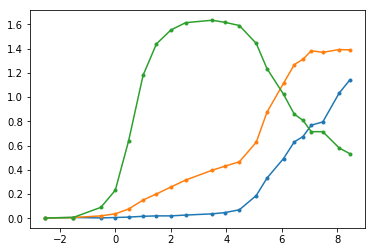

In [4]:
#Select individual
db = MySQLdb.connect(host="129.6.178.117",
                     port=3433,
                     user="audit",
                     passwd="NIST_SHIP",
                     db="DBFEEDBACK_PROD")
#Create a cursor object
cur = db.cursor()
#Get Data for a specific isotherm
feedback_ID = 850
cur.execute("SELECT * FROM feedbacks WHERE id = "+str(feedback_ID))

CI = cur.fetchall()
db.close()

isotherm = json.loads(CI[0][7])

#print pprint.pprint(isotherm)

#Pre-read part of the isotherm, determine composition
num_species = len(isotherm["isotherm_data"][0]["species_data"])
if "total_adsorption" in isotherm["isotherm_data"][0]:
    total_adsorption = True
else:
    total_adsorption = False

#Create data structures
pressure = []
composition = []
adsorption = []
for i in range(num_species):
    composition.append([])
    adsorption.append([])
total_adsorption = []

#Move data from the JSON dictionary to the data arrays
for datapoint in isotherm["isotherm_data"]:
    line = ''
    pressure.append(float(datapoint["pressure"]))
    line = line+str(datapoint["pressure"])+'  '
    ##print(datapoint["pressure"],)
    for (j,species) in enumerate(datapoint["species_data"]):
        composition[j].append(float(species["composition"]))
        adsorption[j].append(float(species["adsorption"]))
        #print species["InChIKey"],
        ##print(species["composition"], species["adsorption"],)
        line = line+str(species["composition"])+'  '+str(species["adsorption"])+'  '
    if total_adsorption:
        total_adsorption.append(float(datapoint["total_adsorption"]))
        ##print(datapoint["total_adsorption"],)
        line = line + str(datapoint["total_adsorption"])
    ##print( '') #Finish the line
    print(line)
print()
    
#print pressure
#print composition[0]
#print adsorption[0]

#Output Plot Metadata
#print
print(isotherm["DOI"])
print(isotherm["articleSource"])
print(isotherm["digitizer"])
print(isotherm["temperature"])
print(isotherm["adsorbates"])
print(isotherm["adsorbent"])
print(isotherm["category"])
#print

#Plot the isotherm(s) [pressure on x-axis]
x = pressure
fig = plt.figure()
for i in range(num_species):
    plt.plot(pressure, adsorption[i],'.-')
    #lt.plot(composition[i], adsorption[i],'.-')
    #plt.plot(np.log10(pressure), adsorption[i],'.-')
    #plt.plot(np.log10(composition[i]), adsorption[i],'.-')
plt.show()
